# See: https://doi.org/10.1186/1471-2288-3-5

In [25]:
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

(0.5166299001832286, 0.12627475540563468)

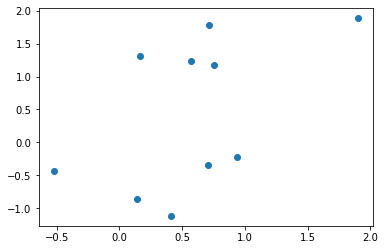

In [61]:
n = 10

x = sp.stats.norm(loc=0, scale=1).rvs(size=n)
y = sp.stats.norm(loc=x, scale=1).rvs()

plt.scatter(x, y)
sp.stats.pearsonr(x, y)

In [71]:
sp.stats.norm?

Signature:       sp.stats.norm(*args, **kwds)
Type:            norm_gen
String form:     <scipy.stats._continuous_distns.norm_gen object at 0x11debb130>
File:            ~/.snakemake/conda/6977e772433a2a61199da9f4de0f6547/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A normal continuous random variable.

The location (``loc``) keyword specifies the mean.
The scale (``scale``) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative dist

In [70]:
def arctanh_r_post(x, y, r_prior=0, n_prior=0):
    n_lik = len(x)
    assert len(x) == len(y)
    r_lik = sp.stats.pearsonr(x, y)[0]
    var_post = 1 / (n_prior + n_lik)
    mean_post = var_post * (n_prior * np.arctanh(r_prior) + n_lik * np.arctanh(r_lik))
    return sp.stats.norm(loc=mean_post, scale=np.sqrt(var_post))

p = tanh_r_post(x, y)

np.tanh(p.ppf([0.025, 0.5, 0.975]))

array([-0.04802637,  0.5166299 ,  0.83105176])